# Aprendizagem de Máquina I

##Professor: Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

##Aluno: João Victor Barboza Machado das Neves

#### j.victor.neves7@gmail.com

Esta aula é inspirada no Ex. 10 do Cap. 6 de [ITSL], e tem como objetivo estudar, em dados sintéticos, o comportamento dos procedimentos de seleção de modelos que vimos em sala (Lasso, Ridge e Elastic Net).

## Parte 1

.a) Gere um conjunto de dados $\mathbf{X}$ com $p = 20$ atributos e $n = 1.000$ observações. Após isso, gere um vetor de variáveis respostas de acordo com a equação $$\mathbf{Y} = \mathbf{X}\boldsymbol{\beta} + \varepsilon,$$ onde o vetor $\boldsymbol{\beta}$ contém a maioria das entradas iguais a zero.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [39]:
n = 1000 # Quantidade de Observações
p = 20 # Quantidade de variáveis explicativas

X = 10*np.random.random(size = (n,p)) # Gerando atributos uniformemente de 0 a 10
beta = np.array([0,1,-3,0,4,
                 -5,0,0,0,0,
                 8,-1,0,0,16,
                 0,6,0,0,-12]) # Escolher beta esparso
epsilon = np.random.normal(loc = 0, scale = 50, size = n) # Gerar um erro de observação "compatível"

y = X@beta + epsilon # @ é o produto matriz-vetor no numpy (mas não é a única forma!)
                    # Gerar a variável resposta

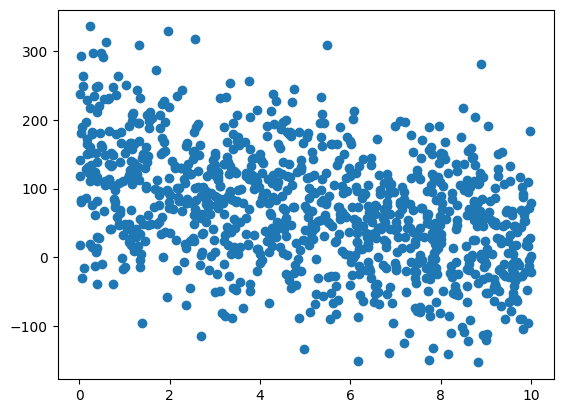

In [40]:
plt.scatter(X[:, -1],y) #Todas as observações na matriz X, referentes a um atributo de interesse
                      # e plotando contra a resposta y

b) Divida seu conjunto em treinamento e teste, com proporção de 90% e 10%, respectivamente.

In [41]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1) #Em X, atributos nas colunas e observações nas linhas

In [42]:
print(X.shape) #Teste de sanidade
print(y.shape)

(1000, 20)
(1000,)


In [43]:
print(X_tr.shape) #Teste de sanidade
print(y_tr.shape)

print(X_te.shape)
print(y_te.shape)

(900, 20)
(900,)
(100, 20)
(100,)


c) Estude o *help* das funções `LinearRegression`, `Lasso`, `Ridge` e `ElasticNet` do `scikit-learn`.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

d) Ajuste modelos, escolhendo os hiperparâmetros a priori, através das funções `LinearRegression`, `Lasso`, `Ridge` e `ElasticNet`. Compare os resultados para os $\boldsymbol{\beta}$ obtidos.

In [44]:
LinReg = LinearRegression() #Instaciando uma réplica da classe LinearRegression,
                            #sem alterar nenhum dos parâmetros declarados por padrão.

Las = Lasso(alpha = 4) # Idem, para o Lasso, fixando aplha = 4 (valor aleatório)

LinReg.fit(X_tr, y_tr) #Obter uma estimativa para beta

Las.fit(X_tr, y_tr) #Idem, através do Lasso

Lasso(alpha=4)

In [45]:
LinReg.coef_ # Estimativa de beta

array([  0.11212248,   1.23328337,  -2.95769143,  -0.04169858,
         5.44312461,  -5.77653042,   0.14305842,   0.56807409,
        -0.47424845,  -0.39587903,   7.77753483,  -1.63123491,
        -0.60707367,  -0.10415469,  16.00517112,  -0.41987983,
         6.18885151,   0.81220786,   0.23795036, -11.13536745])

In [46]:
Las.coef_ # Estimativa de Beta, através do Lasso

array([  0.        ,   0.85149954,  -2.42404167,  -0.        ,
         4.97184502,  -5.23701192,   0.        ,   0.02171491,
        -0.        ,  -0.        ,   7.30105666,  -1.19044077,
        -0.16960783,  -0.        ,  15.4928447 ,  -0.        ,
         5.62529913,   0.341312  ,   0.        , -10.68467256])

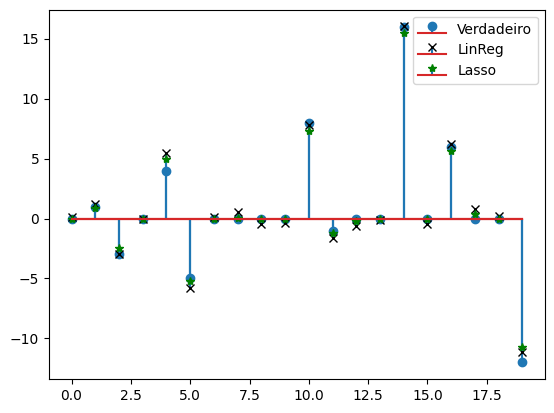

In [47]:
plt.stem(beta, label='Verdadeiro') #Plota beta verdadeiro, com uma legenda associada
plt.stem(LinReg.coef_, markerfmt = 'kx', label='LinReg') #Plota a estimativa para beta, com a "cabeça" sendo cruzes pretas
plt.stem(Las.coef_, markerfmt = 'g*', label='Lasso') #Plota a estimativa para beta, através do Lasso, com a "cabeça" sendo estrelas verdes
plt.legend() # Mostrar a legenda de cada gráfico

e) Faça as previsões com os modelos treinados acima no conjunto de teste, e calcule o MSE. Calcule também o MSE para o conjunto de treinamento.

In [48]:
y_te_LinReg = LinReg.predict(X_te)
y_te_Las = Las.predict(X_te)

In [49]:
MSE_te_LinReg = MSE(y_te_LinReg, y_te)
MSE_te_Las = MSE(y_te_Las, y_te)

In [50]:
print(MSE_te_LinReg)
print(MSE_te_Las)

2217.187717479621
2223.9562769580543


## Parte 2

f) Agora, vamos encontrar o "melhor" valor do hiperparâmetro referente às penalizações acima e repetir as comparações que realizamos. Para isso, primeiramente, familiarize-se com a função `GridSearchCV`, lendo a sua documentação aqui: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

g) Implemente a busca em grade da função `GridSearchCV` para o `Lasso`, `Ridge` e `ElasticNet` e encontre os hiperparâmetros ótimos, dentro da grade que você definiu.

In [51]:
alphas = np.linspace (0.5, 50, 100, endpoint = True) # Declarando a grade de busca do hiperparâmetro de intresse
# alphas = np.logspace(-3, 3, 101, endpoint = True)
# alphas

grid_Las = {'alpha': alphas} # Alocando a grade de busca dentro de um dicionário
# grid_las

#Criando a réplica da classe GridSearchCV com as entradas adequadas
LasCV = GridSearchCV(estimator = Lasso(),
                     param_grid = grid_Las,
                     scoring = 'neg_mean_squared_error', # Quanto maior, melhor
                     cv = 5,
                     verbose = 4,
                     refit = True
                     )

RidgeCV = GridSearchCV(estimator = Ridge(),
                       param_grid = grid_Las,
                       scoring = 'neg_mean_squared_error', # Quanto maior, melhor
                       cv = 5,
                       verbose = 4,
                       refit = True
                       )

l1_ratios = np.linspace(0.1, 0.9, 9, endpoint= True) # Grade de busca para o l1_ratio
grid_ElaNet = {'alpha': alphas,
                'l1_ratio': l1_ratios} # Alocando a grade de busca dentro de um dicionário
# grid_las

#Criando a réplica da classe GridSearchCV com as entradas adequadas
ElaNetCV = GridSearchCV(estimator = ElasticNet(),
                     param_grid = grid_ElaNet,
                     scoring = 'neg_mean_squared_error', # Quanto maior, melhor
                     cv = 5,
                     verbose = 1,
                     refit = True)

In [52]:
LasCV.fit(X_tr, y_tr) #Ajustando para encontrar o melhor alpha

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....................alpha=0.5;, score=-2891.342 total time=   0.0s
[CV 2/5] END .....................alpha=0.5;, score=-1937.851 total time=   0.0s
[CV 3/5] END .....................alpha=0.5;, score=-2500.971 total time=   0.0s
[CV 4/5] END .....................alpha=0.5;, score=-2603.946 total time=   0.0s
[CV 5/5] END .....................alpha=0.5;, score=-2760.086 total time=   0.0s
[CV 1/5] END .....................alpha=1.0;, score=-2879.543 total time=   0.0s
[CV 2/5] END .....................alpha=1.0;, score=-1936.833 total time=   0.0s
[CV 3/5] END .....................alpha=1.0;, score=-2500.516 total time=   0.0s
[CV 4/5] END .....................alpha=1.0;, score=-2597.104 total time=   0.0s
[CV 5/5] END .....................alpha=1.0;, score=-2756.478 total time=   0.0s
[CV 1/5] END .....................alpha=1.5;, score=-2868.481 total time=   0.0s
[CV 2/5] END .....................alpha=1.5;, 

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ,
       22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5,
       28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. ,
       33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5,
       39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. ,
       44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5,
       50. ])},
             scoring='neg_mean_squared_error', verbose=4)

In [53]:
RidgeCV.fit(X_tr, y_tr)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....................alpha=0.5;, score=-2904.251 total time=   0.0s
[CV 2/5] END .....................alpha=0.5;, score=-1939.293 total time=   0.0s
[CV 3/5] END .....................alpha=0.5;, score=-2502.672 total time=   0.0s
[CV 4/5] END .....................alpha=0.5;, score=-2612.062 total time=   0.0s
[CV 5/5] END .....................alpha=0.5;, score=-2764.065 total time=   0.0s
[CV 1/5] END .....................alpha=1.0;, score=-2904.166 total time=   0.0s
[CV 2/5] END .....................alpha=1.0;, score=-1939.283 total time=   0.0s
[CV 3/5] END .....................alpha=1.0;, score=-2502.687 total time=   0.0s
[CV 4/5] END .....................alpha=1.0;, score=-2612.021 total time=   0.0s
[CV 5/5] END .....................alpha=1.0;, score=-2764.144 total time=   0.0s
[CV 1/5] END .....................alpha=1.5;, score=-2904.081 total time=   0.0s
[CV 2/5] END .....................alpha=1.5;, 

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ,
       22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5,
       28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. ,
       33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5,
       39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. ,
       44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5,
       50. ])},
             scoring='neg_mean_squared_error', verbose=4)

In [54]:
ElaNetCV.fit(X_tr, y_tr)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ,
       22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5,
       28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. ,
       33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5,
       39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. ,
       44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5,
       50. ]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_squared_error', verbose=1)

In [55]:
pd.DataFrame(LasCV.cv_results_) # Visualizando o resultado da validação cruzada

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001799,0.000389,0.001118,0.000189,0.5,{'alpha': 0.5},-2891.341604,-1937.850989,-2500.970610,-2603.946298,-2760.085925,-2538.839085,328.654181,9
1,0.001233,0.000052,0.000739,0.000030,1.0,{'alpha': 1.0},-2879.543088,-1936.833440,-2500.516312,-2597.103679,-2756.478266,-2534.094957,325.763009,7
2,0.001310,0.000272,0.000742,0.000055,1.5,{'alpha': 1.5},-2868.481074,-1936.798241,-2499.218718,-2591.757883,-2753.846835,-2530.020550,322.901437,4
3,0.001133,0.000035,0.000688,0.000025,2.0,{'alpha': 2.0},-2860.017617,-1939.733993,-2499.358274,-2587.656778,-2753.066870,-2527.966706,319.789607,2
4,0.001135,0.000056,0.000706,0.000042,2.5,{'alpha': 2.5},-2854.676980,-1943.826275,-2499.935394,-2584.486557,-2753.933732,-2527.371787,317.174785,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001417,0.000295,0.000795,0.000109,48.0,{'alpha': 48.0},-4031.230251,-3745.214279,-4359.136238,-4012.103505,-4803.130189,-4190.162893,363.104640,96
96,0.001176,0.000028,0.000734,0.000031,48.5,{'alpha': 48.5},-4048.743402,-3771.953814,-4384.571074,-4037.860421,-4824.942672,-4213.614276,362.238712,97
97,0.001167,0.000023,0.000758,0.000077,49.0,{'alpha': 49.0},-4065.632467,-3795.876433,-4410.264875,-4063.910980,-4846.948809,-4236.526713,362.208169,98
98,0.001175,0.000051,0.000711,0.000030,49.5,{'alpha': 49.5},-4082.752058,-3820.038181,-4436.217644,-4090.255182,-4869.148599,-4259.682333,362.190753,99


In [56]:
pd.DataFrame(RidgeCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001845,0.000805,0.001044,0.000587,0.5,{'alpha': 0.5},-2904.250663,-1939.293355,-2502.672046,-2612.061656,-2764.065367,-2544.468617,331.728420,100
1,0.001212,0.000036,0.000691,0.000024,1.0,{'alpha': 1.0},-2904.165857,-1939.282836,-2502.687391,-2612.020970,-2764.143836,-2544.460178,331.722211,99
2,0.001222,0.000023,0.000681,0.000010,1.5,{'alpha': 1.5},-2904.081135,-1939.272386,-2502.702807,-2611.980362,-2764.222353,-2544.451808,331.716012,98
3,0.001211,0.000049,0.000738,0.000037,2.0,{'alpha': 2.0},-2903.996496,-1939.262006,-2502.718292,-2611.939830,-2764.300916,-2544.443508,331.709822,97
4,0.001234,0.000034,0.000697,0.000038,2.5,{'alpha': 2.5},-2903.911942,-1939.251694,-2502.733847,-2611.899375,-2764.379527,-2544.435277,331.703641,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001295,0.000068,0.000731,0.000023,48.0,{'alpha': 48.0},-2896.562581,-1938.598112,-2504.437256,-2608.534981,-2771.726507,-2543.971888,331.180057,5
96,0.001271,0.000077,0.000714,0.000015,48.5,{'alpha': 48.5},-2896.485557,-1938.594008,-2504.459086,-2608.501439,-2771.809330,-2543.969884,331.174724,4
97,0.001204,0.000037,0.000705,0.000014,49.0,{'alpha': 49.0},-2896.408613,-1938.589970,-2504.480982,-2608.467971,-2771.892196,-2543.967946,331.169399,3
98,0.002001,0.000491,0.000888,0.000111,49.5,{'alpha': 49.5},-2896.331749,-1938.585998,-2504.502944,-2608.434576,-2771.975108,-2543.966075,331.164083,2


In [57]:
pd.DataFrame(ElaNetCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002273,0.001640,0.000951,0.000227,0.5,0.1,"{'alpha': 0.5, 'l1_ratio': 0.1}",-2864.263894,-1945.513070,-2525.747335,-2599.925923,-2823.373689,-2551.764782,329.230811,22
1,0.001266,0.000069,0.000726,0.000025,0.5,0.2,"{'alpha': 0.5, 'l1_ratio': 0.2}",-2866.119230,-1943.684995,-2522.043943,-2599.567694,-2815.775115,-2549.438195,329.066128,20
2,0.001253,0.000138,0.000744,0.000033,0.5,0.3,"{'alpha': 0.5, 'l1_ratio': 0.30000000000000004}",-2868.240544,-1942.099452,-2518.547475,-2599.318159,-2808.299078,-2547.300942,328.914473,18
3,0.001234,0.000087,0.000743,0.000036,0.5,0.4,"{'alpha': 0.5, 'l1_ratio': 0.4}",-2870.636903,-1940.787741,-2515.266372,-2599.235301,-2800.956565,-2545.376576,328.770575,15
4,0.001165,0.000071,0.000696,0.000048,0.5,0.5,"{'alpha': 0.5, 'l1_ratio': 0.5}",-2873.317701,-1939.696316,-2512.209414,-2599.387130,-2793.754032,-2543.672918,328.660314,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.001447,0.000192,0.000827,0.000038,50.0,0.5,"{'alpha': 50.0, 'l1_ratio': 0.5}",-5408.337434,-4945.900924,-6010.372545,-5480.730766,-6407.077307,-5650.483795,507.117664,852
896,0.001238,0.000052,0.000761,0.000059,50.0,0.6,"{'alpha': 50.0, 'l1_ratio': 0.6}",-5304.493509,-4861.144686,-5894.281797,-5370.681034,-6303.502730,-5546.820751,500.638823,818
897,0.001194,0.000037,0.000731,0.000027,50.0,0.7,"{'alpha': 50.0, 'l1_ratio': 0.7000000000000001}",-5163.770757,-4747.168600,-5735.539065,-5221.301553,-6162.221654,-5406.000326,491.388751,770
898,0.001324,0.000060,0.000868,0.000206,50.0,0.8,"{'alpha': 50.0, 'l1_ratio': 0.8}",-4959.334928,-4563.989701,-5506.171329,-5009.006437,-5946.874373,-5197.075354,479.672130,699


In [58]:
LasCV.best_estimator_ # Vendo o melhor alpha obtido

Lasso(alpha=np.float64(2.5))

In [59]:
RidgeCV.best_estimator_

Ridge(alpha=np.float64(50.0))

In [60]:
ElaNetCV.best_estimator_

ElasticNet(alpha=np.float64(1.5), l1_ratio=np.float64(0.9))

In [61]:
LasCV.best_estimator_.coef_, RidgeCV.best_estimator_.coef_, ElaNetCV.best_estimator_.coef_ # Vendo os coeficientes obtidos com o melhor alpha e l1_ratio(ElasticNet)

(array([  0.        ,   0.99354387,  -2.62516111,  -0.        ,
          5.14736405,  -5.43242008,   0.        ,   0.2218627 ,
         -0.15207104,  -0.14365721,   7.48976352,  -1.35055512,
         -0.34275931,  -0.        ,  15.67555634,  -0.1367483 ,
          5.83291737,   0.51355909,   0.        , -10.85259704]),
 array([  0.1039767 ,   1.22791168,  -2.93563769,  -0.0417243 ,
          5.41506389,  -5.72744772,   0.13978196,   0.5611545 ,
         -0.46958129,  -0.39300706,   7.72478596,  -1.62478579,
         -0.60104549,  -0.10112938,  15.89735693,  -0.41555478,
          6.14459357,   0.80467403,   0.23062335, -11.06795701]),
 array([  0.        ,   1.08762533,  -2.72378303,  -0.        ,
          5.21026714,  -5.4596086 ,   0.        ,   0.3645642 ,
         -0.29162339,  -0.25709821,   7.49207249,  -1.45986138,
         -0.45557292,  -0.        ,  15.53448124,  -0.26027071,
          5.88059113,   0.63223324,   0.03063973, -10.80563884]))

h) Compare os $\boldsymbol{\beta}$ obtidos com esses procedimentos com os $\boldsymbol{\beta}$ obtidos anteriormente.

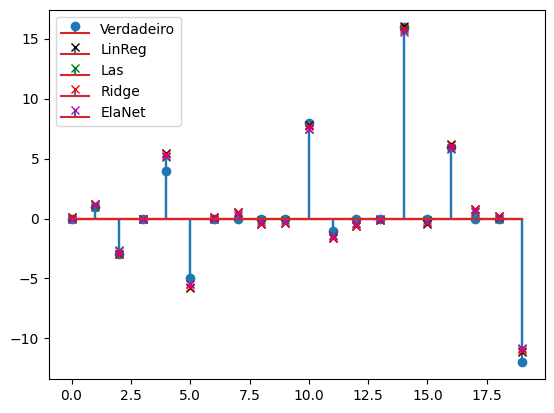

In [62]:
plt.stem(beta, label = 'Verdadeiro') # Plota beta verdadeiro, com uma legenda associada
plt.stem(LinReg.coef_, markerfmt = 'kx', label = 'LinReg') # Plota a estimativa para beta, com a "cabeça" sendo cruzes pretas
plt.stem(LasCV.best_estimator_.coef_, markerfmt = 'gx', label = 'Las') # Plota a estimativa para beta, através do lasso, com a "cabeça" sendo cruzes verdes
plt.stem(RidgeCV.best_estimator_.coef_, markerfmt = 'rx', label = 'Ridge') # Plota a estimativa para beta, com a "cabeça" sendo cruzes vermelhas
plt.stem(ElaNetCV.best_estimator_.coef_, markerfmt = 'mx', label = 'ElaNet') # Plota a estimativa para beta, com a "cabeça" sendo cruzes magentas

plt.legend() # Mostrar a legenda de cada gráfico

i) Faça as previsões com os novos modelos no conjunto de teste, e calcule o MSE. Calcule também o MSE para o conjunto de treinamento. Compare com o resultado obtido no item e).

In [63]:
y_te_LinReg = LinReg.predict(X_te)
y_te_LasCV = LasCV.predict(X_te)
y_te_RidgeCV = RidgeCV.predict(X_te)
y_te_ElaNetCV = ElaNetCV.predict(X_te)

In [64]:
MSE_te_LinReg = MSE(y_te_LinReg, y_te)
MSE_te_LasCV = MSE(y_te_LasCV, y_te)
MSE_te_RidgeCV = MSE(y_te_RidgeCV, y_te)
MSE_te_ElaNetCV = MSE(y_te_ElaNetCV, y_te)

In [65]:
print(MSE_te_LinReg)
print(MSE_te_LasCV)
print(MSE_te_RidgeCV)
print(MSE_te_ElaNetCV)

2217.187717479621
2213.4703795508535
2214.900836861355
2209.205247614555
